In [67]:
import pandas as pd
import numpy as np

with open('../datasets/housing/housing.csv') as f:
    data  = pd.read_csv(f)

In [68]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

### Estratificación según ingreso medio

Estratifico para lograr una muestra que sea representativa de la realidad. Esto no es necesario si tengo un conjunto de datos muy grande

In [69]:
data['income_category'] = np.ceil(data['median_income']/1.5)
data['income_category'].where(data['income_category'] < 5, 5.0, inplace=True)

In [70]:
type(data['income_category'])
data['income_category'].value_counts()
# data['income_category'].astype('category').values

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

In [71]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [72]:
train_index, test_index = next(split.split(data, data['income_category']))
strat_train_set = data.loc[train_index]
strat_test_set = data.loc[test_index]
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_category       16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


### La distribución stratificada se asemeja mucho más a la muestra real que una muestra random

In [73]:
def sample_distribution(data_set, column):
    return data_set[column].value_counts()/len(data_set)

real_distribution = sample_distribution(data, 'income_category')

In [74]:

strat_distribution =  sample_distribution(strat_train_set, 'income_category')

In [75]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


random_distribution = sample_distribution(train_set, 'income_category')


In [76]:
print(real_distribution, random_distribution, strat_distribution, sep='\n')
print('-------------')
print(random_distribution - real_distribution, strat_distribution - real_distribution, sep='\n')

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64
3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_category, dtype: float64
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_category, dtype: float64
-------------
3.0   -0.001986
2.0   -0.001381
4.0    0.002229
5.0    0.001235
1.0   -0.000097
Name: income_category, dtype: float64
3.0    0.000012
2.0    0.000012
4.0   -0.000012
5.0   -0.000036
1.0    0.000024
Name: income_category, dtype: float64


### Limpio los conjuntos de datos para que no tengan la columna extra

In [81]:
strat_test_set.drop(['income_category'], axis=1, inplace=True)
strat_train_set.drop(['income_category'], axis=1, inplace=True)

ValueError: labels ['income_category'] not contained in axis

In [85]:
# Hago una copia del set de datos para no alterarloo mientras exploro
housing = strat_train_set.copy()

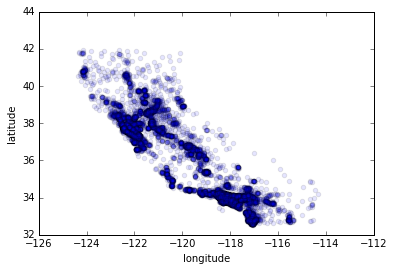

In [91]:
%matplotlib inline
# setting alpha to have good contrast between high density and low density of data points in the set
housing.plot(kind='scatter', x='longitude', y='latitude', alpha='0.1')

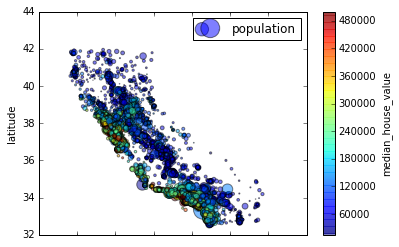

In [104]:
import matplotlib.pyplot as plt
housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.5, 
             s=housing['population']/100, #s: radio de los circulos
             label='population',
             c='median_house_value', # color segun que dato
              cmap=plt.get_cmap('jet'), # mapa de colores predefinidos. El default es escala de grises
             colorbar=True)
plt.legend()

### calcular correlación entre cada par de atributos

In [107]:
corr_matrix = housing.corr()

In [110]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### plotear la relación entre atributos para tener más insight

Puedo ver lineas horizontales extrañas en el siguiente ejemplo. Quizás remover esos distritos sea lo mejor para eliminar datos que no son buenos

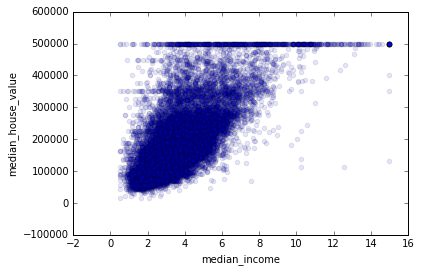

In [113]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha='0.1')